## Evaluating Complexity for Polynomial Model

In this exercise, you will do a similar evaluation of bias and variance error as seen in class of week 3.

The first sections are give, you just can execute to obtain the function to be learned (e.g. a peak) and the noise data from which the function is to be learned.

In step 3., the model is specified which is a polynomial model with degree to be specified. The degree specifies the complexity of the model.

In step 4., do multiple trainings based on independently sampled datasets. Estimate the bias and variance error. Plot the results - either with individual model predictions for given training runs or as a confidence range plot (as shown in the lecture). 

In step 5., do the same as in 4., but now with different model complexities (i.e. degrees of the polynomials). Create a plot with the bias and the variance error (averaged over x). Also plot the variance error against bias error.

In step 6., reflect about what would be the "best" choice of model (complexity) for the given problem at hand.  

### 1. Function to Learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def softrelu(x, alpha=1.0):
    return np.log(1+np.exp(alpha*x))/alpha

def peak(x, loc, width, slope=5.0):    
    def sigmoid(z):
        return 1.0/(1.0+np.exp(-z))
    return sigmoid((x-(loc-width/2))*slope)-sigmoid((x-(loc+width/2))*slope)

(-1.1, 1.1, -0.4, 1.4)

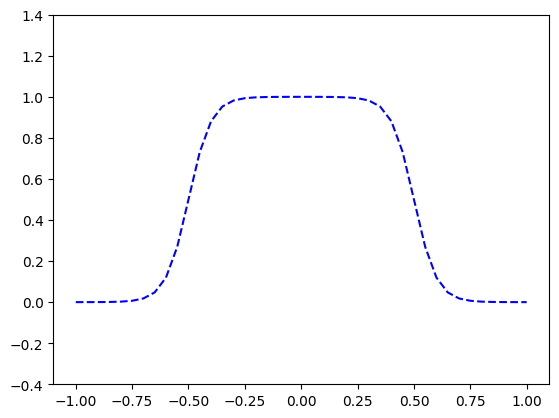

In [3]:
fct, params = peak, {'loc':0.0, 'width':1.0, 'slope':20.0}
xx = np.arange(-1.0,1.01,0.05)
yy = fct(xx,**params)
plt.plot(xx,yy,'b--')
plt.axis([-1.1,1.1,-0.4,1.4])

### 2. Generate Noisy Data

In [4]:
def generate_data(m, fct, params, sigmay=0.1):
    deltax = 2.0/(m-1)
    x = np.arange(-1.0,1.0+deltax-1.0e-6,deltax).reshape(1,m)
    dy = np.random.normal(size=(1,m))*sigmay
    y = fct(x,**params)+dy
    return x,y

def plot_data(x, y, fct, params, plotrange=None):
    xx = np.arange(-1.0,1.01,0.05)
    yy = fct(xx,**params)
    plt.plot(xx,yy,'b--')
    plt.plot(x,y,'r+')
    if plotrange:
        plt.axis(plotrange)
    plt.show()


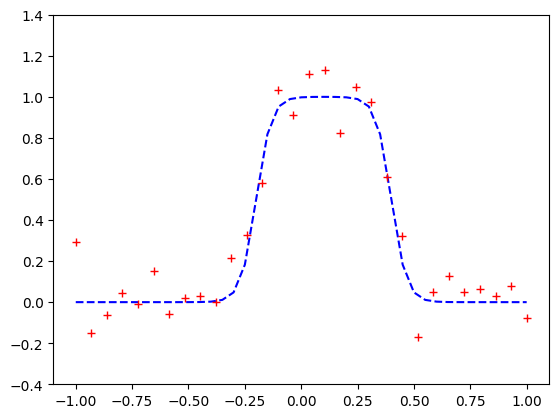

In [5]:
mtrain = 30
fct, params = peak, {'loc':0.1, 'width':0.6, 'slope':30.0}
#fct, params = softrelu, {'alpha':5}
x_train, y_train = generate_data(mtrain,fct, params)
plot_data(x_train,y_train,fct, params, plotrange=[-1.1,1.1,-0.4,1.4])

### 3. Define Model

In [6]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 

class PolyModel():
    
    def __init__(self, degree):
        self.degree = degree
        self.poly = PolynomialFeatures(degree = self.degree)
        self.lin = LinearRegression() 
        
    def fit(self, x, y):
        x_poly = self.poly.fit_transform(x.T)
        self.lin.fit(x_poly,y.T)
        
    def predict(self, x):
        x_poly = self.poly.fit_transform(x.T)
        return self.lin.predict(x_poly).T

In [7]:
def mse_loss(ypred,ytruth):
    return np.average((ypred-ytruth)**2) / 2.0

def fit_eval_model(model, x_train, y_train, x_eval, y_eval, plot=False, plotrange=[-1.1,1.1,-0.5,1.5]):
    model.fit(x_train, y_train)
    ypred_train = model.predict(x_train)
    mse_train = mse_loss(ypred_train, y_train)
    ypred_eval = model.predict(x_eval)
    mse_eval  = mse_loss(ypred_eval, y_eval)
    if plot:
        plt.plot(x_eval.flatten(), ypred_eval.flatten(), 'b-')
        plt.plot(x_eval.flatten(), y_eval.flatten(), 'b--')
        plt.plot(x_train.flatten(), y_train.flatten(), 'r+')
        if plotrange:
            plt.axis(plotrange)
    return mse_train, mse_eval, ypred_eval

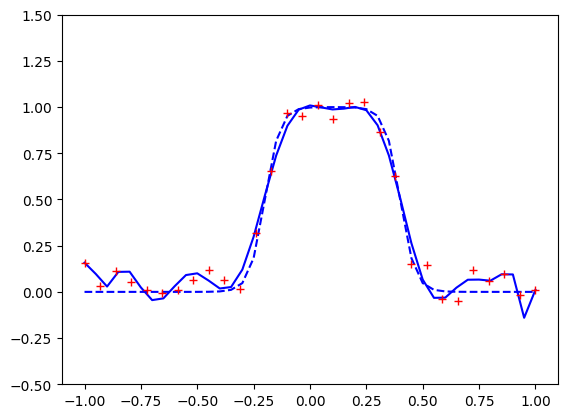

In [8]:
n = 15 # complexity
model = PolyModel(n)
xx = np.arange(-1.0,1.01,0.05)
xx = xx.reshape(1,-1)
yy = fct(xx, **params)
x_train, y_train = generate_data(mtrain, fct, params)
mse_train, mse_eval, ypred = fit_eval_model(model, x_train, y_train, xx, yy, plot=True)

### 4. Multiple Trainings

Here you should perform multiple trainings - each with a fixed model complexity (polynomial degree), but with independently sampled training data (of the same size `mtrain`).

Estimate the bias and the variance error per x-value (values in the xx-array below), but also averaged over all the x-values.

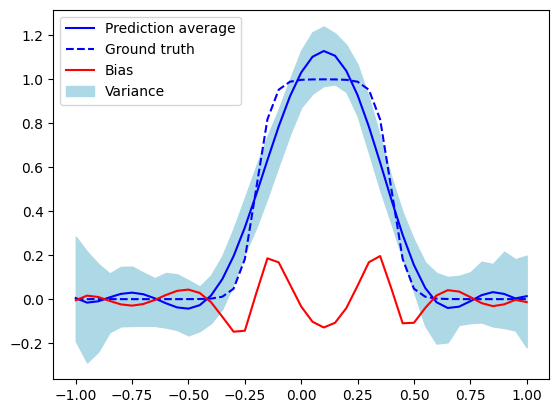

In [95]:
n = 10 # complexity
draws = 50 # number of trainings

# # for evaluation:
xx = np.arange(-1.0,1.01,0.05).reshape(1,-1)
yy = fct(xx, **params)
yypreds = np.zeros((draws, xx.shape[1]))

# perform different trainings (#trainings = draws) based on independently generated 
## YOUR CODE ##

ypreds = np.zeros(shape=(draws, yy.shape[1]))
for idx, d in enumerate(range(draws)):
    model = PolyModel(n)
    x_train, y_train = generate_data(mtrain, fct, params)
    mse_train, mse_eval, ypred = fit_eval_model(model, x_train, y_train, xx, yy, plot=False)
    ypreds[idx] = ypred
# estimate bias and variance error: per x-valued and averaged over all x

ypred_avg = np.average(ypreds, axis=0)

# Variance calculation
bias = (yy - ypred_avg).reshape(-1)
ypred_min = np.min(ypreds, axis=0)
ypred_max = np.max(ypreds, axis=0)
plt.plot(xx.flatten(), ypred_avg.flatten(), 'b-', label="Prediction average")
plt.plot(xx.flatten(), yy.flatten(), 'b--', label="Ground truth")
plt.plot(xx.flatten(), bias, 'r-', label="Bias")
plt.fill_between(xx.flatten(), ypred_min, ypred_max, label="Variance", color="lightblue")
plt.legend()
plt.show()
## YOUR CODE ##


#print(bias, var)

### 5. Compare Different Complexity

In [120]:
ns = np.arange(21)
draws = 200
xx = np.arange(-1.0,1.01,0.05).reshape(1,-1)
yy = fct(xx, **params)
yypreds = np.zeros((len(ns), draws, xx.shape[1]))
biasx = np.zeros((len(ns), xx.shape[1]))
varx = np.zeros((len(ns), xx.shape[1]))
bias = np.zeros((len(ns),))
var = np.zeros((len(ns),))


# compute the bias and variance error for the different complexities (as specified in ns)
## YOUR CODE ##
for n in ns:
    model = PolyModel(n)
    for idx, d in enumerate(range(draws)):
        x_train, y_train = generate_data(mtrain, fct, params)
        mse_train, mse_eval, ypred = fit_eval_model(model, x_train, y_train, xx, yy, plot=False)
        yypreds[n, idx] = ypred

# Get averages over every draw
yypred_avg = np.average(yypreds, axis=1)
bias = np.average((yy - yypred_avg), axis=1)
var = np.average(np.var(yypreds, axis=1), axis=1)
print(yypred_avg.shape)
print(bias.shape)
print(var.shape)

(21, 41)
(21,)
(21,)


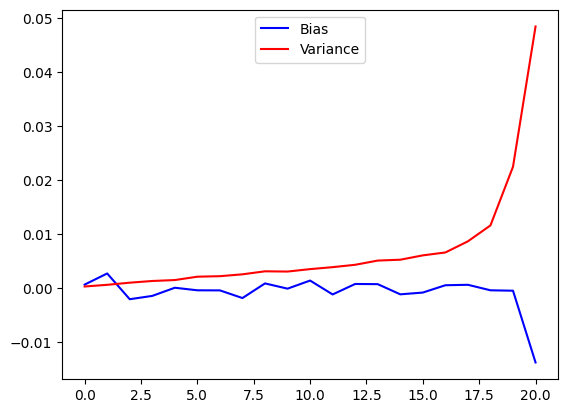

In [121]:
plt.plot(ns, bias, "b-", label="Bias")
plt.plot(ns, var, "r-", label="Variance")
plt.legend(loc='upper center')

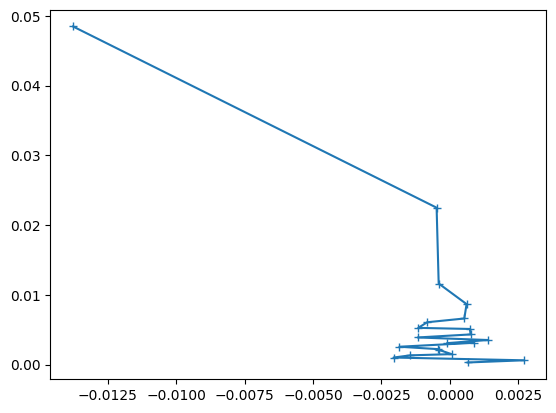

In [122]:
plt.plot(bias, var, "-+")